In [24]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [25]:
# Basic lib imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import collections
from scipy import stats
import seaborn as sns
import pickle
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
#SAPS_SANS_data_NMorph = pd.read_csv('NMorph_dendro_SAPSnSANS.csv')
#SAPS_SANS_data_fBIRN = pd.read_csv('fBIRN_sapsNsans.csv')
#SAPS_SANS_data_NUSDAST = pd.read_csv('NUSDAST_dendro_SAPSnSANS.csv')
#print(SAPS_SANS_data_NUSDAST.shape)
#print(SAPS_SANS_data_fBIRN.shape)
#print(SAPS_SANS_data_NMorph.shape)
#print(16775+6308+5251)

#SAPS_SANS_data = pd.read_csv('O_P_N_2.csv', header=None)
SAPS_SANS_data = pd.read_csv('Organized_data_2_with_FLASH_fBIRN.csv')

SAPS_SANS_data = pd.read_csv('Organized_data_2_with_FLASH_fBIRN.csv')

In [27]:
# from sklearn import decomposition
# fig = plt.figure(1, figsize=(4, 3))
# plt.clf()

# plt.cla()
# pca = decomposition.PCA(n_components=2)
# pca.fit(SAPS_SANS_data.T)
# X = pca.transform(SAPS_SANS_data.T)

# # Reorder the labels to have colors matching the cluster results
# #y = np.choose(y, [1, 2, 0]).astype(np.float)
# plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.spectral)


# plt.show()

SAPS_SANS_data = pd.read_csv('Organized_data_2_with_FLASH_fBIRN.csv')

all_data = SAPS_SANS_data
NUSDAST_data = all_data[:96]

NMorph_data = all_data[96:141]


NUSDAST_data2 = all_data[141:192]


fBIRN_data = all_data[192:]


temp = np.array(NUSDAST_data)
temp_labels = temp[:,0]
temp = temp[:,1:]
temp = temp.astype('float')
print temp.shape

temp2 = np.array(NMorph_data)
temp2_labels = temp2[:,0]
temp2 = temp2[:,1:]
temp2 = temp2.astype('float')
print temp2.shape

temp3 = np.array(NUSDAST_data2)
temp3_labels = temp3[:,0]
temp3 = temp3[:,1:]
temp3 = temp3.astype('float')
print temp3.shape

temp4 = np.array(fBIRN_data)
temp4_labels = temp4[:,0]
temp4 = temp4[:,1:]
temp4 = temp4.astype('float')
print temp4.shape

#print temp

import math
from scipy import stats
temp = np.concatenate([temp,temp3])

zscored_NUSDAST_data = stats.zscore(temp)
print zscored_NUSDAST_data.shape
zscored_NMorph_data = stats.zscore(temp2)
print zscored_NMorph_data.shape
zscored_fBIRN_data = stats.zscore(temp4)
print zscored_fBIRN_data.shape
zscored_fBIRN_data = np.nan_to_num(zscored_fBIRN_data)

all_data = np.concatenate([zscored_NUSDAST_data,zscored_NMorph_data,zscored_fBIRN_data])
print all_data.shape
data_labels = np.concatenate([temp_labels,temp3_labels,temp2_labels,temp4_labels])

# labeled_all_data = np.column_stack([data_labels,all_data])
# print labeled_all_data.shape
SAPS_SANS_data = pd.DataFrame(all_data)


(96, 59)
(45, 59)
(51, 59)
(62, 59)
(147, 59)
(45, 59)
(62, 59)
(254, 59)


In [11]:
#temp=SAPS_SANS_data_NMorph[SAPS_SANS_data_NMorph['Unnamed: 2']=='sans25']
#temp2=np.array(temp)
#print(np.transpose(temp2[:,3]))
#d_NMorph = 
#print(SAPS_SANS_data_NMorph[SAPS_SANS_data_NMorph['Unnamed: 2']=='sans25'])
#print(SAPS_SANS_data_NMorph[SAPS_SANS_data_NMorph['Unnamed: 2']=='sans24'])

In [53]:
#frames = [SAPS_SANS_data_NMorph, SAPS_SANS_data_NUSDAST]

#d = pd.concat(frames)
#d = np.transpose(SAPS_SANS_data)
d = SAPS_SANS_data.T
d = d.fillna(0)
#print(d.shape)

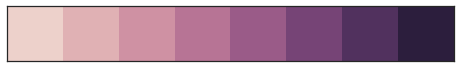

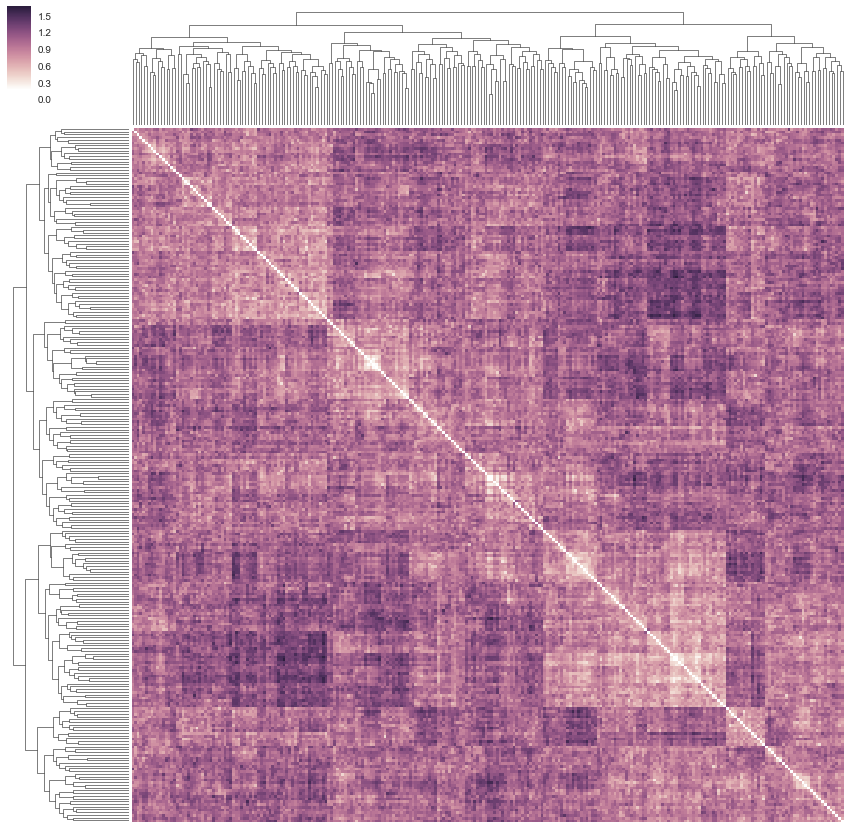

In [120]:
# Intersubject correlations (no CV loop)
sns.set(style="white")
save_figure = True

# Compute the correlation matrix
corr = 1-(d.corr().fillna(0))
#corr = corr.fillna(0) #NAN rise from subject with constant scores over all timepoints (for MMSE)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

#sns.clustermap(data=corr, annot=True, cmap='Greens')
#cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

cmap = sns.palplot(sns.cubehelix_palette(8))
cmap = sns.cubehelix_palette(light=1.1, as_cmap=True)


#g = sns.clustermap(SAPS_SANS_data.T,method='average',metric='correlation',col_cluster=True,cmap=cmap,xticklabels=False,yticklabels=False)#, row_colors=None, col_colors=None, mask=None, 

g = sns.clustermap(corr, method='average', cmap=cmap, figsize=(15, 15),xticklabels=False,yticklabels=False)
#plt.xlabel('Hierarchical Clustering of MCI subject based on correlation of clinical score progression')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.show()

#plt.show()
# if save_figure:
#     fig_name = 'hclust.jpg'
#     g.savefig(fig_name, format='jpeg', dpi=1000) 
#     print 'saving fig at: {}'.format(fig_name)

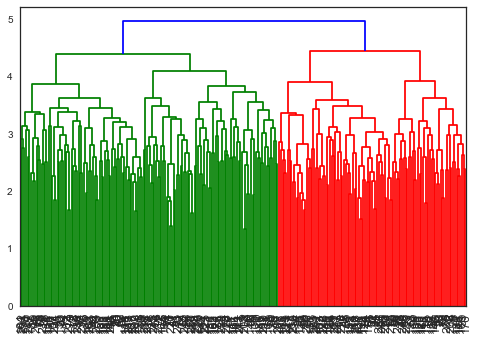

In [121]:
# g = sns.clustermap(corr, metric="correlation")
g.dendrogram_col.linkage # linkage matrix for columns
D = dendrogram(Z=g.dendrogram_col.linkage, color_threshold=4.5, leaf_font_size=12, leaf_rotation=90)
plt.show(D)

In [118]:
#save cluster memberships
import scipy.cluster.hierarchy as sch
num_of_clusters = 3
Z = g.dendrogram_col.linkage
T = sch.fcluster(Z, num_of_clusters, 'maxclust')
print np.sum(T==1),np.sum(T==2),np.sum(T==3),np.sum(T==4),np.sum(T==5)
print T

# num_of_clusters = 3

# Z = linkage(SAPS_SANS_data,method='average',metric='correlation')
# T = sch.fcluster(Z, num_of_clusters, 'maxclust')

# print np.sum(T==1),np.sum(T==2),np.sum(T==3),np.sum(T==4),np.sum(T==5),np.sum(T==6)

# cluster_labels = pd.DataFrame(T)
# subjectInfo = pd.DataFrame(data_labels)

99 78 77 0 0
[3 3 1 3 1 3 3 1 2 2 3 2 1 1 1 3 3 2 1 2 2 3 1 1 1 3 1 2 1 1 3 1 1 2 3 1 2
 2 1 1 2 2 2 1 2 1 2 3 1 1 1 3 3 2 3 1 2 3 3 3 3 3 2 2 1 2 1 1 1 2 1 3 3 2
 3 2 3 3 2 1 2 3 1 3 1 1 3 3 1 1 2 1 2 2 1 3 3 3 3 3 1 1 1 1 1 1 1 2 3 3 1
 3 2 3 3 3 3 1 1 3 1 1 1 1 1 1 3 1 3 3 3 2 2 1 2 2 3 2 2 2 2 2 3 2 2 3 1 3
 1 1 2 2 1 2 2 3 2 2 1 3 1 2 2 1 3 1 1 3 2 1 1 1 3 1 1 1 2 1 1 2 1 1 2 1 2
 1 2 1 2 3 2 2 1 2 3 2 2 3 1 2 1 2 1 2 1 1 1 2 3 2 3 3 3 2 2 1 2 3 1 3 3 3
 1 1 1 3 1 1 3 3 3 2 1 2 2 2 2 1 2 3 3 3 3 2 2 3 1 2 1 1 3 1 1 1]
99 78 77 0 0 0


In [239]:
y = (T==5)
g=np.array(d)
group_five = g[:,y]
avg_five = np.mean(group_five, axis=1)
print avg_five.shape

y = (T==4)
g=np.array(d)
group_four = g[:,y]
avg_four = np.mean(group_four, axis=1)
print avg_four.shape

y = (T==1)
group_one = g[:,y]
avg_one = np.mean(group_one, axis=1)
print avg_one.shape

y = (T==2)
group_two = g[:,y]
avg_two = np.mean(group_two, axis=1)
print avg_two.shape

y = (T==3)
group_three = g[:,y]
avg_three = np.mean(group_three, axis=1)
print avg_three.shape

print avg_one

(59,)
(59,)
(59,)
(59,)
(59,)
[ 1.46666667  0.5         0.63333333  0.7         0.6         0.46666667
  0.83333333  1.76666667  0.8         0.43333333  0.2         0.53333333
  1.16666667  0.86666667  3.46666667  2.43333333  2.96666667  1.86666667
  1.3         2.16666667  3.03333333  3.03333333  0.76666667  2.83333333
  2.26666667  1.53333333  1.          0.63333333  0.86666667  0.26666667
  1.1         1.5         1.23333333  0.1         0.3         0.7
  0.33333333  0.23333333  1.4         0.7         0.93333333  0.76666667
  0.43333333  0.13333333  2.13333333  0.26666667  0.06666667  0.2
  0.26666667  0.53333333  0.4         0.8         0.03333333  0.3         0.5
  0.16666667  0.06666667  0.          0.83333333]


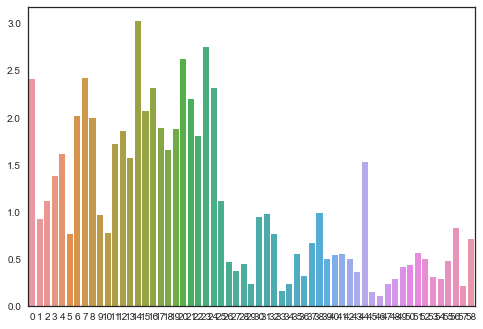

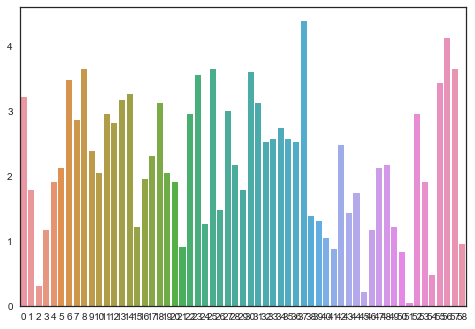

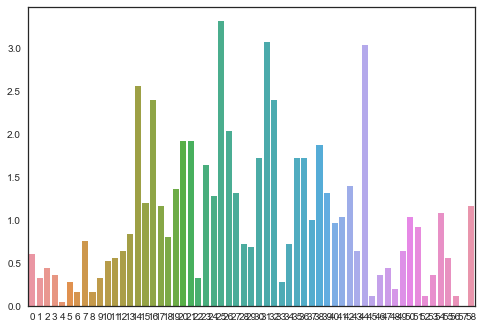

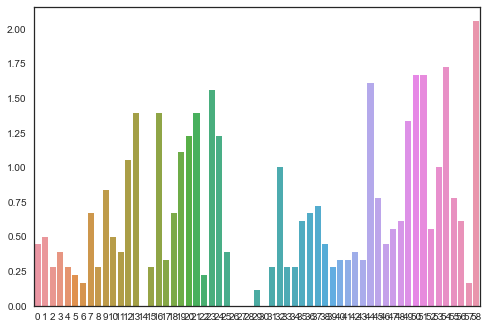

(59, 4)


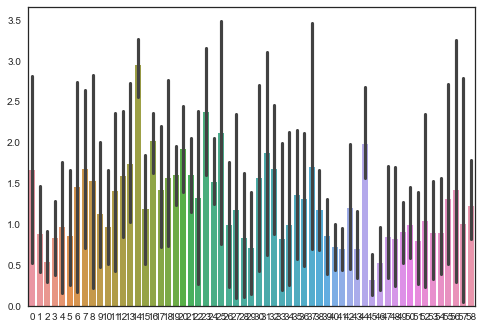

In [142]:
#data = np.column_stack((avg_one,avg_two,avg_three,avg_four))
#print data.shape
data = pd.DataFrame(avg_one)
ax = sns.barplot(data=data.T)
plt.show()

data = pd.DataFrame(avg_two)
ax = sns.barplot(data=data.T)
plt.show()

data = pd.DataFrame(avg_three)
ax = sns.barplot(data=data.T)
plt.show()

data = pd.DataFrame(avg_four)
ax = sns.barplot(data=data.T)
plt.show()

data = pd.DataFrame(np.column_stack((avg_one,avg_two,avg_three,avg_four)))
print data.shape
ax = sns.barplot(data=data.T)
plt.show()

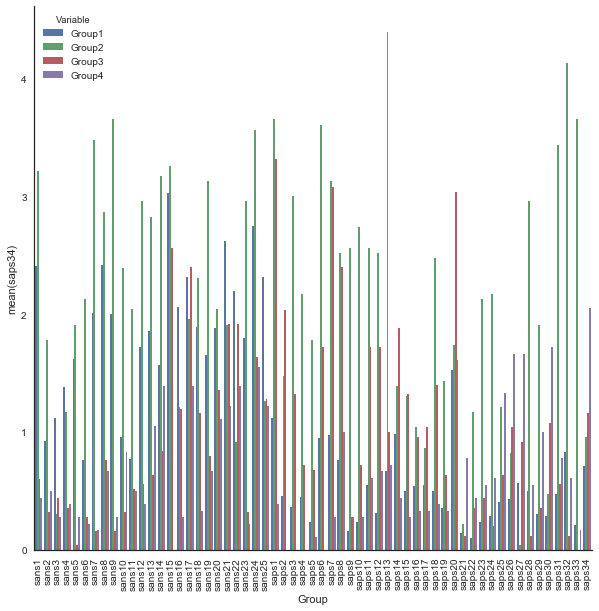

In [206]:
import matplotlib.pyplot as pyplot
df = pd.DataFrame({
    'Group': ['sans1','sans2', 'sans3','sans4', 'sans5','sans6', 'sans7','sans8', 'sans9','sans10', 'sans11','sans12', 'sans13','sans14', 'sans15','sans16', 'sans17','sans18', 'sans19','sans20', 'sans21','sans22', 'sans23','sans24', 'sans25','saps1', 'saps2','saps3', 'saps4','saps5', 'saps6','saps7', 'saps8','saps9', 'saps10','saps11', 'saps12','saps13', 'saps14','saps15', 'saps16','saps17', 'saps18','saps19', 'saps20','saps21', 'saps22','saps23', 'saps24','saps25', 'saps26','saps27', 'saps28','saps29', 'saps30','saps31', 'saps32','saps33','saps34'],
    'Group1': avg_one,
    'Group2': avg_two,
    'Group3': avg_three,
    'Group4': avg_four
})
fig, ax1 = pyplot.subplots(figsize=(10, 10))
tidy = (
    df.set_index('Group')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'saps34'})
)
snsplot = sns.barplot(x='Group', y='saps34', hue='Variable', data=tidy, ax=ax1)
for item in snsplot.get_xticklabels():
    item.set_rotation(90)
sns.despine(fig)
plt.show()

In [240]:
Group1_blunting = np.mean(avg_one[0:8])
Group1_alogia = np.mean(avg_one[8:13])
Group1_apathy = np.mean(avg_one[13:17])
Group1_asociality = np.mean(avg_one[17:22])
Group1_attention= np.mean(avg_one[22:25])
Group1_hallucinations = np.mean(avg_one[25:32])
Group1_delusions = np.mean(avg_one[32:45])
Group1_bibeh = np.mean(avg_one[45:50])
Group1_positiveF = np.mean(avg_one[50:59])
Group1 = [Group1_blunting,Group1_alogia,Group1_apathy,Group1_asociality,Group1_attention,Group1_hallucinations,Group1_delusions,Group1_bibeh,Group1_positiveF]

Group2_blunting = np.mean(avg_two[0:8])
Group2_alogia = np.mean(avg_two[8:13])
Group2_apathy = np.mean(avg_two[13:17])
Group2_asociality = np.mean(avg_two[17:22])
Group2_attention= np.mean(avg_two[22:25])
Group2_hallucinations = np.mean(avg_two[25:32])
Group2_delusions = np.mean(avg_two[32:45])
Group2_bibeh = np.mean(avg_two[45:50])
Group2_positiveF = np.mean(avg_two[50:59])
Group2 = [Group2_blunting,Group2_alogia,Group2_apathy,Group2_asociality,Group2_attention,Group2_hallucinations,Group2_delusions,Group2_bibeh,Group2_positiveF]

Group3_blunting = np.mean(avg_three[0:8])
Group3_alogia = np.mean(avg_three[8:13])
Group3_apathy = np.mean(avg_three[13:17])
Group3_asociality = np.mean(avg_three[17:22])
Group3_attention= np.mean(avg_three[22:25])
Group3_hallucinations = np.mean(avg_three[25:32])
Group3_delusions = np.mean(avg_three[32:45])
Group3_bibeh = np.mean(avg_three[45:50])
Group3_positiveF = np.mean(avg_three[50:59])
Group3 = [Group3_blunting,Group3_alogia,Group3_apathy,Group3_asociality,Group3_attention,Group3_hallucinations,Group3_delusions,Group3_bibeh,Group3_positiveF]

Group4_blunting = np.mean(avg_four[0:8])
Group4_alogia = np.mean(avg_four[8:13])
Group4_apathy = np.mean(avg_four[13:17])
Group4_asociality = np.mean(avg_four[17:22])
Group4_attention= np.mean(avg_four[22:25])
Group4_hallucinations = np.mean(avg_four[25:32])
Group4_delusions = np.mean(avg_four[32:45])
Group4_bibeh = np.mean(avg_four[45:50])
Group4_positiveF = np.mean(avg_four[50:59])
Group4 = [Group4_blunting,Group4_alogia,Group4_apathy,Group4_asociality,Group4_attention,Group4_hallucinations,Group4_delusions,Group4_bibeh,Group4_positiveF]

Group5_blunting = np.mean(avg_five[0:8])
Group5_alogia = np.mean(avg_five[8:13])
Group5_apathy = np.mean(avg_five[13:17])
Group5_asociality = np.mean(avg_five[17:22])
Group5_attention= np.mean(avg_five[22:25])
Group5_hallucinations = np.mean(avg_five[25:32])
Group5_delusions = np.mean(avg_five[32:45])
Group5_bibeh = np.mean(avg_five[45:50])
Group5_positiveF = np.mean(avg_five[50:59])
Group5 = [Group5_blunting,Group5_alogia,Group5_apathy,Group5_asociality,Group5_attention,Group5_hallucinations,Group5_delusions,Group5_bibeh,Group5_positiveF]

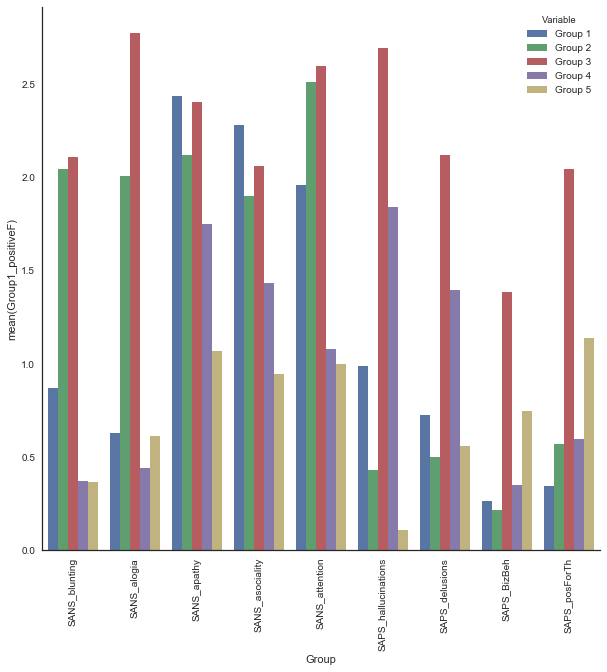

In [258]:
import matplotlib.pyplot as pyplot
df = pd.DataFrame({
    'Group': ['SANS_blunting','SANS_alogia', 'SANS_apathy','SANS_asociality', 'SANS_attention','SAPS_hallucinations', 'SAPS_delusions','SAPS_BizBeh', 'SAPS_posForTh'],
    'Group 1': Group1,
    'Group 2': Group2,
    'Group 3': Group3,
    'Group 4': Group4,
    'Group 5': Group5
})
fig, ax1 = pyplot.subplots(figsize=(10, 10))
tidy = (
    df.set_index('Group')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Group1_positiveF'})
)
snsplot = sns.barplot(x='Group', y='Group1_positiveF', hue='Variable', data=tidy, ax=ax1)
for item in snsplot.get_xticklabels():
    item.set_rotation(90)
sns.despine(fig)
plt.show()

plt.savefig('yourTitle.png')

In [143]:
print data

           0         1     2         3
0   2.407895  3.217391  0.60  0.444444
1   0.921053  1.782609  0.32  0.500000
2   1.118421  0.304348  0.44  0.277778
3   1.381579  1.173913  0.36  0.388889
4   1.618421  1.913043  0.04  0.277778
5   0.763158  2.130435  0.28  0.222222
6   2.013158  3.478261  0.16  0.166667
7   2.421053  2.869565  0.76  0.666667
8   2.000000  3.652174  0.16  0.277778
9   0.960526  2.391304  0.32  0.833333
10  0.776316  2.043478  0.52  0.500000
11  1.723684  2.956522  0.56  0.388889
12  1.855263  2.826087  0.64  1.055556
13  1.565789  3.173913  0.84  1.388889
14  3.026316  3.260870  2.56       NaN
15  2.065789  1.217391  1.20  0.277778
16  2.315789  1.956522  2.40  1.388889
17  1.894737  2.304348  1.16  0.333333
18  1.657895  3.130435  0.80  0.666667
19  1.881579  2.043478  1.36  1.111111
20  2.618421  1.913043  1.92  1.222222
21  2.197368  0.913043  1.92  1.388889
22  1.802632  2.956522  0.32  0.222222
23  2.750000  3.565217  1.64  1.555556
24  2.315789  1.260870  1

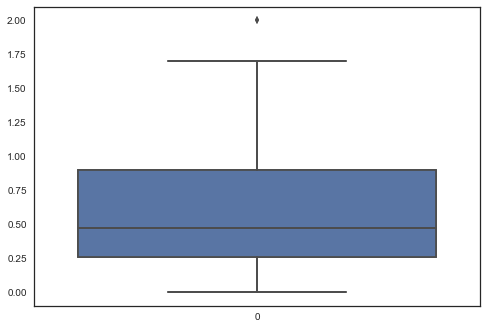

In [53]:
ax = sns.boxplot(data=avg_four)
plt.show()

In [32]:
print(g.dendrogram_row.linkage)

[[  37.           57.            0.53862406    2.        ]
 [  55.           56.            0.61031912    2.        ]
 [  25.           31.            0.63227776    2.        ]
 [  11.           22.            0.65024732    2.        ]
 [   6.            8.            0.65951234    2.        ]
 [  59.           60.            0.76358432    4.        ]
 [   9.           10.            0.81569829    2.        ]
 [  46.           48.            0.84837662    2.        ]
 [   0.           62.            0.85221616    3.        ]
 [   7.           12.            0.92084837    2.        ]
 [  52.           64.            0.9210796     5.        ]
 [   3.            4.            0.92134343    2.        ]
 [  27.           30.            0.9467619     2.        ]
 [  51.           54.            0.95334628    2.        ]
 [  35.           36.            0.96533566    2.        ]
 [  33.           34.            0.96904574    2.        ]
 [  38.           40.            0.98089701    2.       

In [106]:
a = pd.DataFrame(np.random.permutation(d))

In [101]:
d_trans = np.transpose(d)
a = pd.DataFrame(np.transpose(np.random.permutation(d_trans)))

In [102]:
print d
print a

               0    1    2    3    4    5    6    7    8    9  ...    49   50  \
Unnamed: 0    1.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  1.0  1.0 ...   3.0  2.0   
Unnamed: 1    5.0  1.0  2.0  0.0  0.0  0.0  0.0  2.0  2.0  3.0 ...   2.0  0.0   
Unnamed: 2    1.0  0.0  2.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0 ...   0.0  1.0   
Unnamed: 3    0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0 ...   0.0  1.0   
Unnamed: 4    3.0  3.0  3.0  1.0  2.0  1.0  3.0  3.0  3.0  3.0 ...   0.0  4.0   
Unnamed: 5    1.0  0.0  0.0  3.0  0.0  0.0  0.0  2.0  0.0  2.0 ...   1.0  1.0   
Unnamed: 6    0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  2.0 ...   1.0  1.0   
Unnamed: 7    4.0  0.0  0.0  2.0  0.0  0.0  0.0  3.0  2.0  0.0 ...   0.0  0.0   
Unnamed: 8    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  1.0   
Unnamed: 9    2.0  2.0  2.0  0.0  0.0  0.0  2.0  2.0  0.0  0.0 ...   1.0  1.0   
Unnamed: 10   3.0  0.0  0.0  4.0  0.0  0.0  0.0  3.0  2.0  2.0 ...   2.0  0.0   
Unnamed: 11   3.0  1.0  1.0 

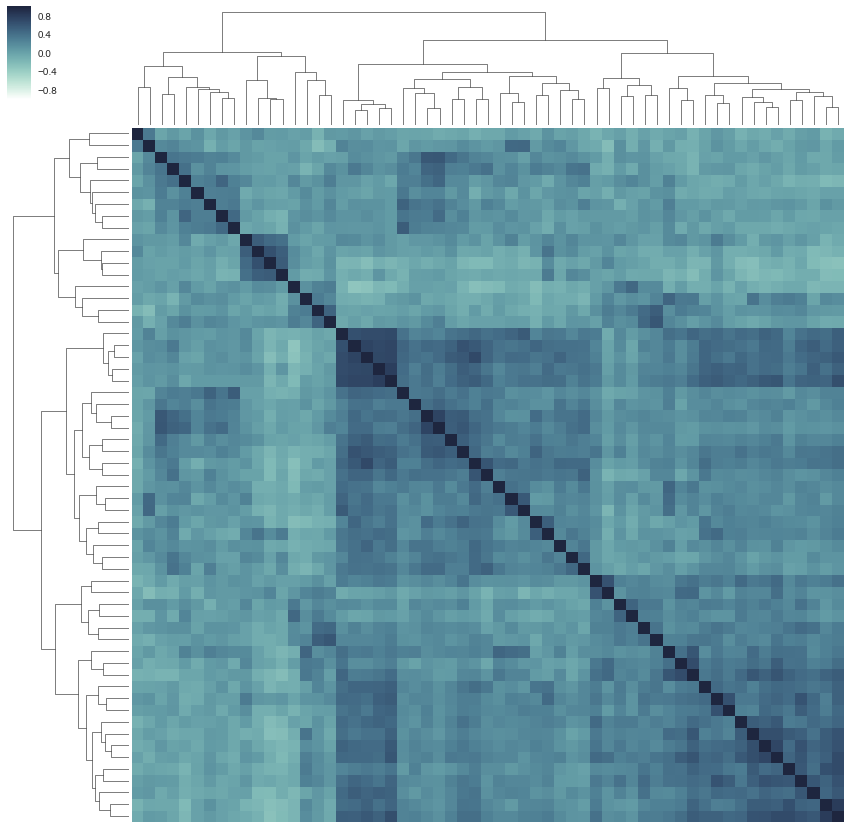

In [107]:
# Intersubject correlations (no CV loop)
sns.set(style="white")
save_figure = False

corr_a = a.corr()

# Generate a mask for the upper triangle
mask_a = np.zeros_like(corr_a, dtype=np.bool)
mask_a[np.triu_indices_from(mask_a)] = True

# Generate a custom diverging colormap
cmap_a = sns.diverging_palette(220, 10, as_cmap=True)

#sns.clustermap(data=corr, annot=True, cmap='Greens')
cmap_a = sns.cubehelix_palette(as_cmap=True, rot=-0.3, light=1)

g_a = sns.clustermap(corr_a, method='complete', cmap=cmap_a, figsize=(15, 15),xticklabels=False,yticklabels=False)
#plt.xlabel('Hierarchical Clustering of MCI subject based on correlation of clinical score progression')
plt.setp(g_a.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
    
if save_figure:
    fig_name = 'hclust.jpg'
    g.savefig(fig_name, format='jpeg', dpi=1000) 
    print 'saving fig at: {}'.format(fig_name)

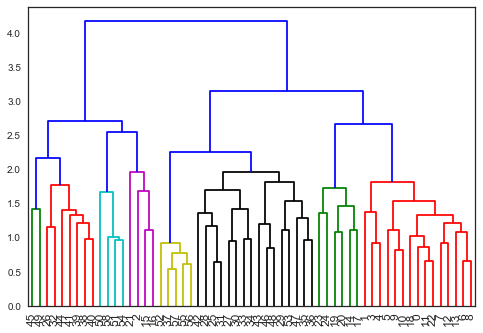

In [108]:
g_a.dendrogram_col.linkage # linkage matrix for columns
F = dendrogram(Z=g_a.dendrogram_col.linkage, color_threshold=2, leaf_font_size=12, leaf_rotation=90)
plt.show(F)

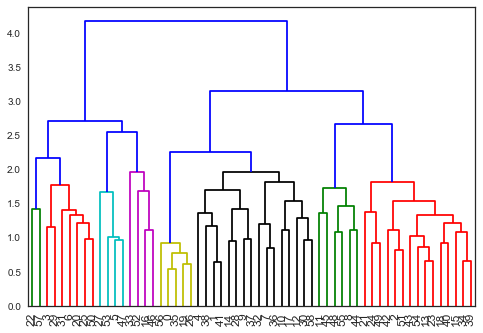

In [105]:
g_a.dendrogram_col.linkage # linkage matrix for columns
F = dendrogram(Z=g_a.dendrogram_col.linkage, color_threshold=2, leaf_font_size=12, leaf_rotation=90)
plt.show(F)

In [58]:
# Creates a simple Gantt chart
# Adapted from https://bitbucket.org/DBrent/phd/src/1d1c5444d2ba2ee3918e0dfd5e886eaeeee49eec/visualisation/plot_gantt.py
# BHC 2014
# """
 
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.dates
from matplotlib.dates import MONTHLY, DateFormatter, rrulewrapper, RRuleLocator
 
from pylab import *
 
def create_date(month,year):
# """Creates the date"""
 
    date = dt.datetime(int(year), int(month), 1)
    mdate = matplotlib.dates.date2num(date)
 
return mdate
 
# Data
 
pos = arange(0.5,5.5,0.5)
 
ylabels = []
ylabels.append('Hardware Design & Review')
ylabels.append('Hardware Construction')
ylabels.append('Integrate and Test Laser Source')
ylabels.append('Objective #1')
ylabels.append('Objective #2')
ylabels.append('Present at ASMS')
ylabels.append('Present Data at Gordon Conference')
ylabels.append('Manuscripts and Final Report')
 
effort = []
effort.append([0.2, 1.0])
effort.append([0.2, 1.0])
effort.append([0.2, 1.0])
effort.append([0.3, 0.75])
effort.append([0.25, 0.75])
effort.append([0.3, 0.75])
effort.append([0.5, 0.5])
effort.append([0.7, 0.4])
 
customDates = []
customDates.append([create_date(5,2014),create_date(6,2014)])
customDates.append([create_date(6,2014),create_date(8,2014),create_date(8,2014)])
customDates.append([create_date(7,2014),create_date(9,2014),create_date(9,2014)])
customDates.append([create_date(10,2014),create_date(3,2015),create_date(3,2015)])
customDates.append([create_date(2,2015),create_date(6,2015),create_date(6,2015)])
customDates.append([create_date(5,2015),create_date(6,2015),create_date(6,2015)])
customDates.append([create_date(6,2015),create_date(7,2015),create_date(7,2015)])
customDates.append([create_date(4,2015),create_date(8,2015),create_date(8,2015)])
 
task_dates = {}
for i,task in enumerate(ylabels):
    task_dates[task] = customDates[i]
# task_dates['Climatology'] = [create_date(5,2014),create_date(6,2014),create_date(10,2013)]
# task_dates['Structure'] = [create_date(10,2013),create_date(3,2014),create_date(5,2014)]
# task_dates['Impacts'] = [create_date(5,2014),create_date(12,2014),create_date(2,2015)]
# task_dates['Thesis'] = [create_date(2,2015),create_date(5,2015)]
 
# Initialise plot
 
fig = plt.figure()
# ax = fig.add_axes([0.15,0.2,0.75,0.3]) #[left,bottom,width,height]
ax = fig.add_subplot(111)
 
# Plot the data
 
start_date,end_date = task_dates[ylabels[0]]
ax.barh(0.5, end_date - start_date, left=start_date, height=0.3, align='center', color='blue', alpha = 0.75)
ax.barh(0.45, (end_date - start_date)*effort[0][0], left=start_date, height=0.1, align='center', color='red', alpha = 0.75, label = "PI Effort")
ax.barh(0.55, (end_date - start_date)*effort[0][1], left=start_date, height=0.1, align='center', color='yellow', alpha = 0.75, label = "Student Effort")
for i in range(0,len(ylabels)-1):
    labels = ['Analysis','Reporting'] if i == 1 else [None,None]
    start_date,mid_date,end_date = task_dates[ylabels[i+1]]
    piEffort, studentEffort = effort[i+1]
    ax.barh((i*0.5)+1.0, mid_date - start_date, left=start_date, height=0.3, align='center', color='blue', alpha = 0.75)
    ax.barh((i*0.5)+1.0-0.05, (mid_date - start_date)*piEffort, left=start_date, height=0.1, align='center', color='red', alpha = 0.75)
    ax.barh((i*0.5)+1.0+0.05, (mid_date - start_date)*studentEffort, left=start_date, height=0.1, align='center', color='yellow', alpha = 0.75)
    # ax.barh((i*0.5)+1.0, end_date - mid_date, left=mid_date, height=0.3, align='center',label=labels[1], color='yellow')

# Format the y-axis
 
locsy, labelsy = yticks(pos,ylabels)
plt.setp(labelsy, fontsize = 14)
 
# Format the x-axis
 
ax.axis('tight')
ax.set_ylim(ymin = -0.1, ymax = 4.5)
ax.grid(color = 'g', linestyle = ':')
 
ax.xaxis_date() #Tell matplotlib that these are dates...
 
rule = rrulewrapper(MONTHLY, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter("%b '%y")
 
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
labelsx = ax.get_xticklabels()
plt.setp(labelsx, rotation=30, fontsize=12)
 
# Format the legend
 
font = font_manager.FontProperties(size='small')
ax.legend(loc=1,prop=font)
 
# Finish up
ax.invert_yaxis()
fig.autofmt_xdate()
#plt.savefig('gantt.svg')
plt.show()

SyntaxError: 'return' outside function (<ipython-input-58-818345657f08>, line 20)